<a href="https://colab.research.google.com/github/saketh269/INFO-5731---Computational-Methods-for-Information-Systems/blob/main/Mekala_Saketh_Reddy_Assignment_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [20]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
nltk.download('wordnet')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# IMDb reviews URL
url = 'https://www.imdb.com/title/tt15398776/reviews?ref_=tt_urv'

# Function to fetch data from the URL using BeautifulSoup
def fetch_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.text
    else:
        print("Failed to fetch data from URL:", url)
        return None

# Function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove HTML tags and special characters
    text = re.sub('<.*?>', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and lemmatize words
    stop_words = set(stopwords.words('english'))
    tokens = [Word(word).lemmatize() for word in tokens if word not in stop_words]
    return tokens

# Function to extract reviews from IMDb page using BeautifulSoup
def extract_reviews(url):
    html_content = fetch_data(url)
    if html_content:
        soup = BeautifulSoup(html_content, 'html.parser')
        reviews = soup.find_all("div", class_="text")
        return [review.get_text() for review in reviews]
    else:
        return None

# Fetch reviews from IMDb
reviews = extract_reviews(url)

# Create DataFrame from the collected data
df = pd.DataFrame(reviews, columns=['Review'])

# Apply text preprocessing to 'Review' column
df['Cleaned Review'] = df['Review'].apply(preprocess_text)

# Function to calculate n-gram frequencies
def calculate_ngram_frequencies(tokens, n):
    ngrams = list(nltk.ngrams(tokens, n))
    frequency_dist = nltk.FreqDist(ngrams)
    return frequency_dist

# Apply functions to calculate frequencies and probabilities
df['Trigram Frequencies'] = df['Cleaned Review'].apply(lambda x: calculate_ngram_frequencies(x, 3))
df['Bigram Frequencies'] = df['Cleaned Review'].apply(lambda x: calculate_ngram_frequencies(x, 2))

# Display the DataFrame
print(df.head(100))


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                               Review  \
0   One of the most anticipated films of the year ...   
1   You'll have to have your wits about you and yo...   
2   I'm a big fan of Nolan's work so was really lo...   
3   "Oppenheimer" is a biographical thriller film ...   
4   This movie is just... wow! I don't think I hav...   
5   I was familiar with the Manhattan project and ...   
6   Cillian Murphy is exceptional in the lead role...   
7   I'm still collecting my thoughts after experie...   
8   Is it just me or did anyone else find this mov...   
9   I may consider myself lucky to be alive to wat...   
10  Okay, Nolan fans, get your fingers poised to d...   
11  Oppenheimer might be the best film I watched i...   
12  The film looks great is brilliantly acted but ...   
13  It saddens me that so many people are mistakin...   
14  0 out of 10 starsChristopher Nolan's Oppenheim...   
15  Just came out of the theater and watching Oppe...   
16  At its core Oppenheimer is 

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
import requests
from bs4 import BeautifulSoup
import math

# Function to fetch data from a URL using BeautifulSoup
def fetch_data(url):
    # Send a GET request to the URL
    response = requests.get(url)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Return the HTML content of the page
        return response.text
    else:
        # If request failed, print an error message and return None
        print("Failed to fetch data from URL:", url)
        return None

# IMDb reviews URL
url = 'https://www.imdb.com/title/tt15398776/reviews?ref_=tt_urv'

# Function to extract reviews from IMDb page using BeautifulSoup
def extract_reviews(url):
    # Fetch HTML content from the URL
    html_content = fetch_data(url)
    # Check if content was fetched successfully
    if html_content:
        # Parse the HTML using BeautifulSoup
        soup = BeautifulSoup(html_content, 'html.parser')
        # Find all review div elements
        reviews = soup.find_all("div", class_="text")
        # Extract the text content of each review and return as a list
        return [review.get_text() for review in reviews]
    else:
        # If content fetching failed, return None
        return None

# Fetch reviews from IMDb
reviews = extract_reviews(url)

# Preprocess reviews
preprocessed_reviews = [review.lower().replace('<br/>', ' ') for review in reviews]

# Define query
query = "An Outstanding movie with a outstanding visuals and best character "
query = query.lower()

# Calculate TF-IDF values for the query
query_words = query.split()
doc_freq = {}
# Calculate document frequency for each word in the query
for doc in preprocessed_reviews:
    for word in set(query_words):
        if word in doc:
            doc_freq[word] = doc_freq.get(word, 0) + 1

# Calculate cosine similarity scores
cosine_scores = []

# Calculate cosine similarity scores between query and documents
for i, doc in enumerate(preprocessed_reviews):
    words = doc.split()
    # Calculate TF-IDF values for each word in the document
    tfidf_values = [words.count(word) / len(words) * math.log(len(preprocessed_reviews) / (1 + doc_freq.get(word, 0))) for word in query_words]
    # Calculate cosine similarity score for the document
    similarity_score = sum(tfidf_values) / (math.sqrt(sum(x ** 2 for x in tfidf_values)) * math.sqrt(len(query_words)))
    # Append document index and similarity score to the list
    cosine_scores.append((i+1, similarity_score))

# Sort documents based on cosine similarity scores
cosine_scores.sort(key=lambda x: x[1], reverse=True)

# Print ranked documents
print("Ranked Documents:")
for doc_index, score in cosine_scores:
    print(f"Document {doc_index}: Cosine Similarity Score: {score}")







Ranked Documents:
Document 14: Cosine Similarity Score: 0.5224154633825989
Document 22: Cosine Similarity Score: 0.4499817626295597
Document 19: Cosine Similarity Score: 0.3952653336319497
Document 5: Cosine Similarity Score: 0.31226694811343947
Document 18: Cosine Similarity Score: 0.31076875903244033
Document 12: Cosine Similarity Score: 0.3039853776453674
Document 9: Cosine Similarity Score: 0.22293939389422038
Document 17: Cosine Similarity Score: 0.15647703264155333
Document 6: Cosine Similarity Score: 0.1328862619850703
Document 24: Cosine Similarity Score: 0.11833853917011498
Document 16: Cosine Similarity Score: 0.10079375326870965
Document 23: Cosine Similarity Score: 0.09670610644622664
Document 25: Cosine Similarity Score: 0.09549139665686739
Document 4: Cosine Similarity Score: 0.08801740950591304
Document 10: Cosine Similarity Score: 0.08460955930210247
Document 7: Cosine Similarity Score: 0.05599594672017582
Document 1: Cosine Similarity Score: -0.014403112613539465
Docum

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [15]:
import re  # Import the 're' module for regular expressions
import requests
from bs4 import BeautifulSoup
from gensim.models import Word2Vec  # Import Word2Vec model from gensim

# Function to fetch data from a URL
def fetch_data(url):
    # Send a GET request to the URL
    response = requests.get(url)
    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Return the HTML content of the page
        return response.text
    else:
        # If request failed, print an error message and return None
        print("Failed to fetch data from URL:", url)
        return None

# Sample dataset URL
url = "https://www.imdb.com/title/tt15398776/reviews?ref_=tt_urv'"

# Fetching and processing data
html_content = fetch_data(url)
if html_content:
    # Parse HTML content using BeautifulSoup
    soup = BeautifulSoup(html_content, 'html.parser')
    # Extract text from review div elements and store in a list
    reviews = [review.text for review in soup.find_all("div", class_="text show-more__control")]

# Preprocess the text data
def preprocess_text(text):
    # Remove HTML tags using regex
    text = re.sub(r'<.*?>', '', text)
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text)
    # Convert text to lowercase
    text = text.lower()
    return text

# Tokenize the text data
tokenized_reviews = [preprocess_text(review).split() for review in reviews]

# Train word2vec model with higher min_count
model = Word2Vec(sentences=tokenized_reviews, vector_size=300, window=5, min_count=5, workers=4)
# Get word embeddings
word_embeddings = model.wv

# Example: Get embedding for a specific word
embedding_for_movie = word_embeddings['movie']
print("Embedding for 'movie':", embedding_for_movie)


Embedding for 'movie': [ 2.70557981e-02  9.98166353e-02 -3.47754434e-02  1.62631944e-02
  1.43860355e-02 -1.45665437e-01  9.98543873e-02  3.19579363e-01
 -1.44412071e-02 -7.05848932e-02  5.45769110e-02 -1.04212493e-01
  6.17916696e-04 -1.99362449e-02 -4.86447029e-02 -5.82696125e-02
  1.11617364e-01  3.40266116e-02 -2.39821151e-03 -7.64080659e-02
 -5.70575073e-02 -5.46619035e-02  8.31551254e-02  1.15052061e-02
  5.27383834e-02 -4.46827002e-02 -2.33795911e-01  3.03772688e-02
 -2.85906438e-02 -1.03254862e-01  3.63159217e-02 -1.50374128e-02
  1.01453066e-02  5.34172207e-02 -9.40771773e-02  4.49105725e-02
  5.76017983e-03 -1.55399546e-01 -3.56171690e-02 -4.71996469e-03
 -6.56909198e-02  4.47722375e-02  3.82063352e-02 -1.15160242e-01
  9.78575945e-02  1.19643092e-01  9.49858800e-02  2.80906912e-02
 -3.03756967e-02  1.35173753e-01  7.15661496e-02  1.51335727e-02
 -4.32360619e-02  4.98126186e-02 -1.62971001e-02  4.31436300e-02
  5.58298118e-02  2.17645504e-02  5.31706885e-02  4.96791005e-02
 -

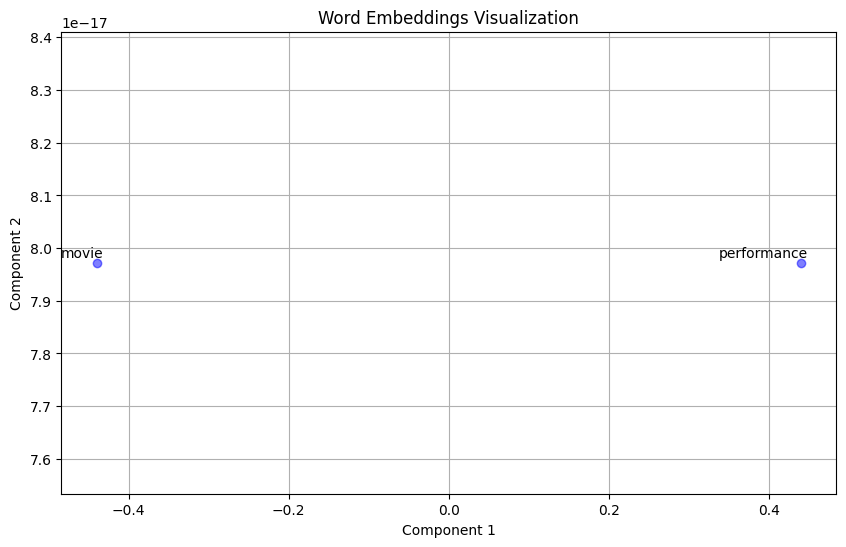

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Visualize word embeddings
def plot_embeddings(model, words):
    # Filter out words not present in the vocabulary
    words_in_vocab = [word for word in words if word in model.wv]
    word_vectors = [model.wv[word] for word in words_in_vocab]
    coordinates = PCA(n_components=2).fit_transform(word_vectors)
    plt.figure(figsize=(10, 6))  # Set the figure size for the plot
    plt.scatter(coordinates[:, 0], coordinates[:, 1], marker='o', c='blue', alpha=0.5)  # Scatter plot of word embeddings
    # Add annotations for each word
    for i, word in enumerate(words_in_vocab):
        plt.annotate(word, xy=(coordinates[i, 0], coordinates[i, 1]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
    plt.xlabel('Component 1')  # Label for x-axis
    plt.ylabel('Component 2')  # Label for y-axis
    plt.title('Word Embeddings Visualization')  # Title of the plot
    plt.grid(True)  # Show grid
    plt.show()  # Display the plot

# Sample words to visualize
words_to_visualize = ['movie', 'performance', 'outstanding', 'haunting']

# Plot word embeddings
plot_embeddings(model, words_to_visualize)


## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file

# Link: https://github.com/saketh269/INFO-5731---Computational-Methods-for-Information-Systems/blob/main/Sentimental_reviews.csv



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


All reviews saved to 'reviews_all.csv'.


# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer